# Data Exploration

In [2]:
data=pd.read_csv('sample.csv', low_memory=False, index_col=0)
print(data.shape)

(60213, 202)


In [3]:
data.head()

SubscriberID SnapshotDate  campaign_1  campaign_2  campaign_3  campaign_4  \
1    4629739439   2017-02-28           0           0           0           0   
2   10505531439   2017-04-30           0           0           0           0   
3   12309121439   2016-12-31           0           0           0           0   
4   13634651439   2017-02-28           0           0           0           0   
5   13634651439   2017-04-30           0           0           0           0   

   campaign_5  campaign_6  campaign_7  campaign_8 ...   iospresure2  \
1           0           0           0           0 ...           0.0   
2           0           0           0           0 ...           0.0   
3           0           0           0           0 ...           0.0   
4           0           0           0           0 ...           0.0   
5           0           0           0           0 ...           0.0   

   allpresure1  allpresure2  deg_in  deg_out     eig_whole       eig_dir  \
1          0.0          0.0     NaN      NaN           NaN           NaN   
2          0.0          0.0     NaN      NaN           NaN           NaN   
3          0.0          0.0    33.0     48.0  3.580770e-09  3.580770e-09   
4          0.0          0.0     NaN      NaN           NaN           NaN   
5          0.0          0.0     NaN      NaN           NaN           NaN   

   eig_simple           clo  bet  
1         NaN           NaN  NaN  
2         NaN           NaN  NaN  
3    0.000007  2.485181e-13  0.0  
4         NaN           NaN  NaN  
5         NaN           NaN  NaN  

[5 rows x 202 columns]

In [4]:
# series of variable names
data.columns

Index(['SubscriberID', 'SnapshotDate', 'campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'campaign_6', 'campaign_7',
       'campaign_8',
       ...
       'iospresure2', 'allpresure1', 'allpresure2', 'deg_in', 'deg_out',
       'eig_whole', 'eig_dir', 'eig_simple', 'clo', 'bet'],
      dtype='object', length=202)

In [5]:
# looking for data duplicates and deleting them 
print(data.duplicated().sum())
#data.loc[data.duplicated(keep='first'), :]

data.drop_duplicates(inplace=True)
print(data.shape)

1677
(58536, 202)


In [6]:
# extracting ID of the customers
id=data['SubscriberID']

In [7]:
# determining all unique data types 
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [8]:
df_int=data.select_dtypes(include=['int64'])
df_int.head()

#df_int['Andpresure1'].value_counts()
#df_int['Andpresure2'].value_counts()

SubscriberID  campaign_1  campaign_2  campaign_3  campaign_4  campaign_5  \
1    4629739439           0           0           0           0           0   
2   10505531439           0           0           0           0           0   
3   12309121439           0           0           0           0           0   
4   13634651439           0           0           0           0           0   
5   13634651439           0           0           0           0           0   

   campaign_6  campaign_7  campaign_8  campaign_9  campaign_10  campaign_11  \
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           0           0           0            0            0   
5           0           0           0           0            0            0   

   campaign_12  campaign_13  campaign_14  campaign_15  campaign_16  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   
5            0            0            0            0            0   

   Andpresure1  Andpresure2  
1            0            0  
2            0            0  
3            0            0  
4            0            0  
5            0            0

## Responses 

In [9]:
# Assuming that a positive response coresponds to "1" and a negative response number to "0"
# Calculating the number of positive responses to each campaigns
target=df_int.drop(['SubscriberID', 'Andpresure1', 'Andpresure2'], axis=1)
print(target.sum().sum())
target.head()

9357


campaign_1  campaign_2  campaign_3  campaign_4  campaign_5  campaign_6  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   campaign_7  campaign_8  campaign_9  campaign_10  campaign_11  campaign_12  \
1           0           0           0            0            0            0   
2           0           0           0            0            0            0   
3           0           0           0            0            0            0   
4           0           0           0            0            0            0   
5           0           0           0            0            0            0   

   campaign_13  campaign_14  campaign_15  campaign_16  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  
5            0            0            0            0

## Object Type Data 

In [10]:
# object data type
df_obj=data.select_dtypes(exclude=[np.number])
print(df_obj.shape)
df_obj.head()

(58536, 15)


SnapshotDate StartDate EndDate Cycle CustomerStatus CustomerTypeGroup  \
1   2017-02-28       NaN     NaN   NaN         Active        Individual   
2   2017-04-30       NaN     NaN   NaN         Active        Individual   
3   2016-12-31       NaN     NaN   NaN         Active        Individual   
4   2017-02-28       NaN     NaN   NaN         Active        Individual   
5   2017-04-30       NaN     NaN   NaN         Active        Individual   

  CustomerSegment PackagePlanSubscriptionDate          SalesChannel Gender  \
1      Individual                  2017-01-28  SalesChannel_Unknown   Male   
2      Individual                  2014-06-04  SalesChannel_Unknown    NaN   
3      Individual                  2016-12-08  SalesChannel_Unknown    NaN   
4      Individual                  2014-06-05  SalesChannel_Unknown    NaN   
5      Individual                  2014-06-05  SalesChannel_Unknown    NaN   

    BirthDate MaritalStatus Nationality     Occupation RechargeMonth  
1  1979-12-07           NaN      Indian     Accountant           NaN  
2  1992-02-28           NaN      German        Student           NaN  
3  1978-09-02           NaN      German  Labour worker           NaN  
4  1983-06-03           NaN      German         Others           NaN  
5  1983-06-03           NaN      German         Others           NaN

In [11]:
# Count of unique values for SnapshotDate
#df_obj['SnapshotDate'].value_counts(dropna=False).plot.bar()
#df_obj['SnapshotDate'].isna().sum()

In [12]:
# include dummie if StartDate is present for a customer
#df_obj['StartDate'].value_counts(dropna=False)
#df_obj['StartDate'].isna().sum()

In [13]:
# include dummie if EndDate is present for a customer
#df_obj['EndDate'].value_counts(dropna=False)
#df_obj['EndDate'].isna().sum()

In [14]:
#df_obj['Cycle'].value_counts(dropna=False)
#df_obj['Cycle'].isna()
# Possibly create Dummies for n Months

In [15]:
#df_obj['CustomerStatus'].value_counts(dropna=False)

In [16]:
#df_obj['CustomerTypeGroup'].value_counts(dropna=False)

In [17]:
#df_obj['CustomerSegment'].value_counts(dropna=False)

In [18]:
#df_obj['PackagePlanSubscriptionDate'].value_counts(dropna=False)

In [19]:
#df_obj['SalesChannel'].value_counts(dropna=False)

In [20]:
#df_obj['Gender'].value_counts(dropna=False).plot.bar()

In [21]:
# probably multiple data on birth data
# Create Age column for birth date
age=pd.to_datetime('today').year- pd.to_datetime(df_obj['BirthDate']).dt.year
len(age)

58536

In [22]:
df_obj.shape

(58536, 15)

In [23]:
#df_obj['MaritalStatus'].value_counts(dropna=False)

In [24]:
#df_obj['Nationality'].value_counts(dropna=False)

In [25]:
#df_obj['Occupation'].value_counts(dropna=False)

In [26]:
#df_obj['RechargeMonth'].value_counts(dropna=False)
# possibly create dummy for those customers whos RechargeMonth is not NAN 

## Numerical Data

In [27]:
# continuous data type
df_float=data.select_dtypes(include=['float64'])
print(df_float.shape)
df_float.head()

(58536, 168)


NumVoicePrepaid  NumVoicePostpaid  VoiceOnNet  VoiceOffNet  VoiceInt  \
1             54.0             293.0       109.0        213.0      25.0   
2             46.0             217.0       248.0         15.0       0.0   
3             52.0             435.0       377.0        110.0       0.0   
4             22.0             123.0       138.0          7.0       0.0   
5             35.0             137.0       148.0         24.0       0.0   

   NumCalls  CallDuration  NumSMSPrepaid  NumSMSPostpaid  SMSOnNet ...   \
1     347.0       30086.0            0.0             4.0       2.0 ...    
2     263.0       60040.0            0.0             1.0       1.0 ...    
3     487.0       50901.0            0.0             2.0       0.0 ...    
4     145.0       12110.0            NaN             NaN       NaN ...    
5     172.0       19604.0            NaN             NaN       NaN ...    

   iospresure2  allpresure1  allpresure2  deg_in  deg_out     eig_whole  \
1          0.0          0.0          0.0     NaN      NaN           NaN   
2          0.0          0.0          0.0     NaN      NaN           NaN   
3          0.0          0.0          0.0    33.0     48.0  3.580770e-09   
4          0.0          0.0          0.0     NaN      NaN           NaN   
5          0.0          0.0          0.0     NaN      NaN           NaN   

        eig_dir  eig_simple           clo  bet  
1           NaN         NaN           NaN  NaN  
2           NaN         NaN           NaN  NaN  
3  3.580770e-09    0.000007  2.485181e-13  0.0  
4           NaN         NaN           NaN  NaN  
5           NaN         NaN           NaN  NaN  

[5 rows x 168 columns]

In [28]:
pd.set_option('display.max_rows', 1000)
df_float.notnull().mean().sort_values(ascending=False)

ChurnPresure1                           1.000000
allpresure2                             1.000000
allpresure1                             1.000000
iospresure2                             1.000000
iospresure1                             1.000000
ChurnPresure2                           1.000000
RGE1Subscriberbase                      0.997933
RGE90Subscriberbase                     0.997933
RGE30Subscriberbase                     0.997933
EoPProvisionedBase                      0.997933
EoP_SubscribersApOG                     0.997301
NumVoicePrepaid                         0.988315
CallDuration                            0.988315
NumCalls                                0.988315
VoiceInt                                0.988315
VoiceOffNet                             0.988315
VoiceOnNet                              0.988315
NumVoicePostpaid                        0.988315
RoamingOutound                          0.986555
InterconnectPayableRevenue              0.986555
InterconnectReceivab

In [29]:
# Sorting columns by perentage of missing values 
# counting percantage of missing values in each columns
na_count=df_float.notnull().mean()
na_count.name=100000
# appending row that contains missing value counts
df2=df_float.append(na_count)
# sorting dataframe by missing value counts
df2.sort_values(by=100000, axis=1,ascending=False, inplace=True)
# droping missing value counts from dataframe
df2.drop(100000, inplace=True)

In [30]:
df2.shape

(58536, 168)

In [31]:
pd.set_option('display.max_columns', 1000)
df2.head(n=15)

ChurnPresure2  allpresure2  ChurnPresure1  iospresure1  iospresure2  \
1        0.000000     0.000000       0.000000     0.000000     0.000000   
2        0.000000     0.000000       0.000000     0.000000     0.000000   
3        0.047185     0.000000       0.026052     0.000000     0.000000   
4        0.000000     0.000000       0.000000     0.000000     0.000000   
5        0.000000     0.000000       0.000000     0.000000     0.000000   
6        0.000000     0.000000       0.000000     0.000000     0.000000   
7        0.000000     0.000000       0.000000     0.000000     0.000000   
8        0.000000     0.000000       0.000000     0.000000     0.000000   
9        0.000000     0.000000       0.000000     0.000000     0.000000   
10       0.000000     0.058274       0.000000     0.009199     0.022060   
11       0.000000     0.000000       0.000000     0.000000     0.000000   
12       0.036867     0.019123       0.005518     0.000491     0.010036   
13       0.100983     0.000000       0.047151     0.000000     0.000000   
14       0.000000     0.000000       0.000000     0.000000     0.000000   
15       0.000000     0.000000       0.000000     0.000000     0.000000   

    allpresure1  RGE30Subscriberbase  RGE90Subscriberbase  RGE1Subscriberbase  \
1      0.000000                  0.0                  0.0                 0.0   
2      0.000000                  0.0                  0.0                 0.0   
3      0.000000                  0.0                  0.0                 0.0   
4      0.000000                  0.0                  0.0                 0.0   
5      0.000000                  0.0                  0.0                 0.0   
6      0.000000                  0.0                  0.0                 0.0   
7      0.000000                  0.0                  0.0                 0.0   
8      0.000000                  0.0                  0.0                 0.0   
9      0.000000                  0.0                  0.0                 0.0   
10     0.043233                  0.0                  0.0                 0.0   
11     0.000000                  1.0                  1.0                 1.0   
12     0.000491                  0.0                  0.0                 0.0   
13     0.000000                  0.0                  0.0                 0.0   
14     0.000000                  0.0                  0.0                 0.0   
15     0.000000                  1.0                  1.0                 1.0   

    EoPProvisionedBase  EoP_SubscribersApOG  NumVoicePrepaid  VoiceOnNet  \
1                  1.0                  1.0             54.0       109.0   
2                  1.0                  1.0             46.0       248.0   
3                  1.0                  1.0             52.0       377.0   
4                  1.0                  1.0             22.0       138.0   
5                  1.0                  1.0             35.0       148.0   
6                  1.0                  1.0              2.0         6.0   
7                  1.0                  1.0            121.0       456.0   
8                  1.0                  1.0              9.0       163.0   
9                  1.0                  1.0             45.0       173.0   
10                 1.0                  1.0             61.0       244.0   
11                 1.0                  0.0           1498.0      1219.0   
12                 1.0                  0.0            150.0       146.0   
13                 1.0                  1.0             24.0       396.0   
14                 1.0                  1.0             38.0       132.0   
15                 1.0                  0.0           1322.0       517.0   

    VoiceOffNet  VoiceInt  CallDuration  NumVoicePostpaid  NumCalls  \
1         213.0      25.0       30086.0             293.0     347.0   
2          15.0       0.0       60040.0             217.0     263.0   
3         110.0       0.0       50901.0             435.0     487.0   
4    

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214AF9A1B70>,
      dtype=object)

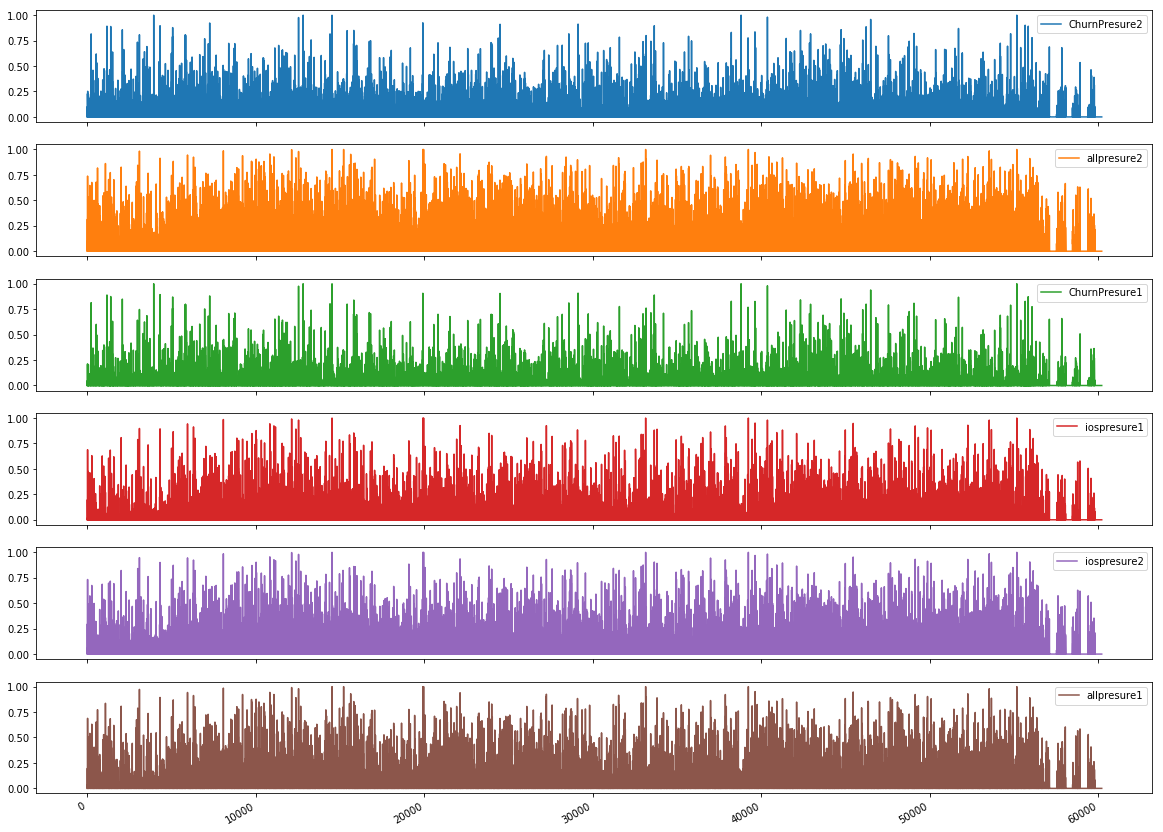

In [32]:
df2[df2.columns[0:6]].plot(kind='line', subplots=True, figsize=(20,16))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214AFB6B198>,
      dtype=object)

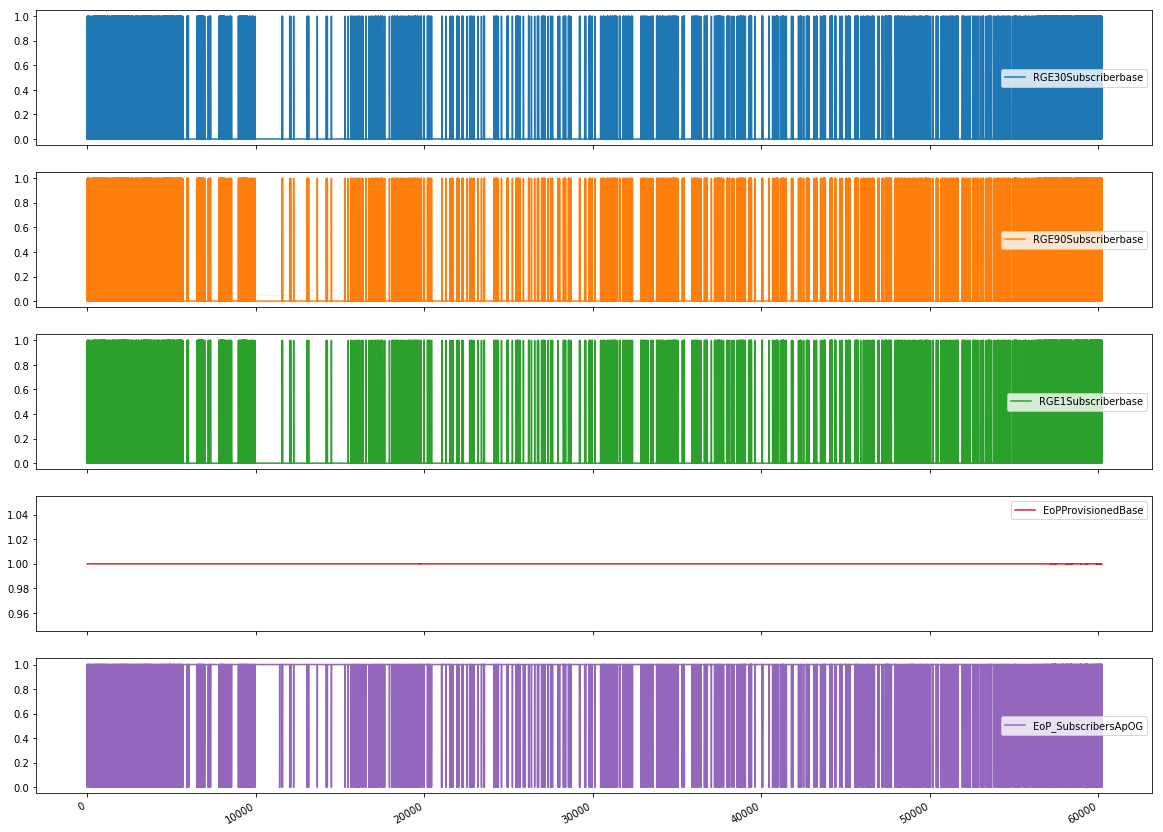

In [33]:
df2[df2.columns[6:11]].plot(kind='line', subplots=True, figsize=(20,16))

In [34]:
# It seems that EoPProvisionedBase is a constant with value 1 and missing values
df_float['EoPProvisionedBase'].unique()

array([ 1., nan])

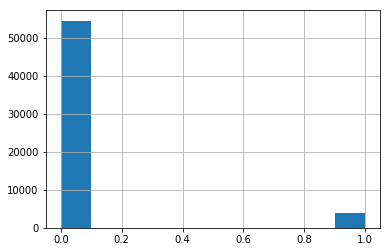

In [35]:
# Let's find out if there is more columns with only one value
# RGE30Subscriberbase is a binary and takes two values '0' and '1'
df_float['RGE30Subscriberbase'].hist()

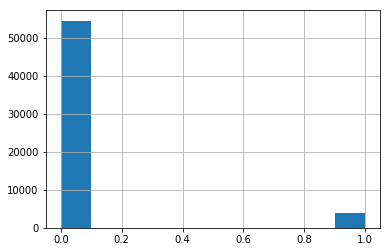

In [36]:
# RGE90Subscriberbase is a binary and takes two values '0' and '1'
df_float['RGE90Subscriberbase'].hist()

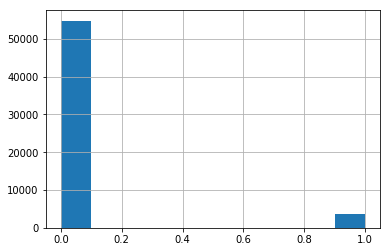

In [37]:
# RGE1Subscriberbase is a binary and takes two values '0' and '1'
df_float['RGE1Subscriberbase'].hist()

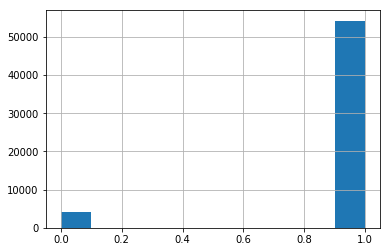

In [38]:
# EoP_SubscribersApOG is a binary and takes two values '0' and '1'
df_float['EoP_SubscribersApOG'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214BCDDAC50>,
      dtype=object)

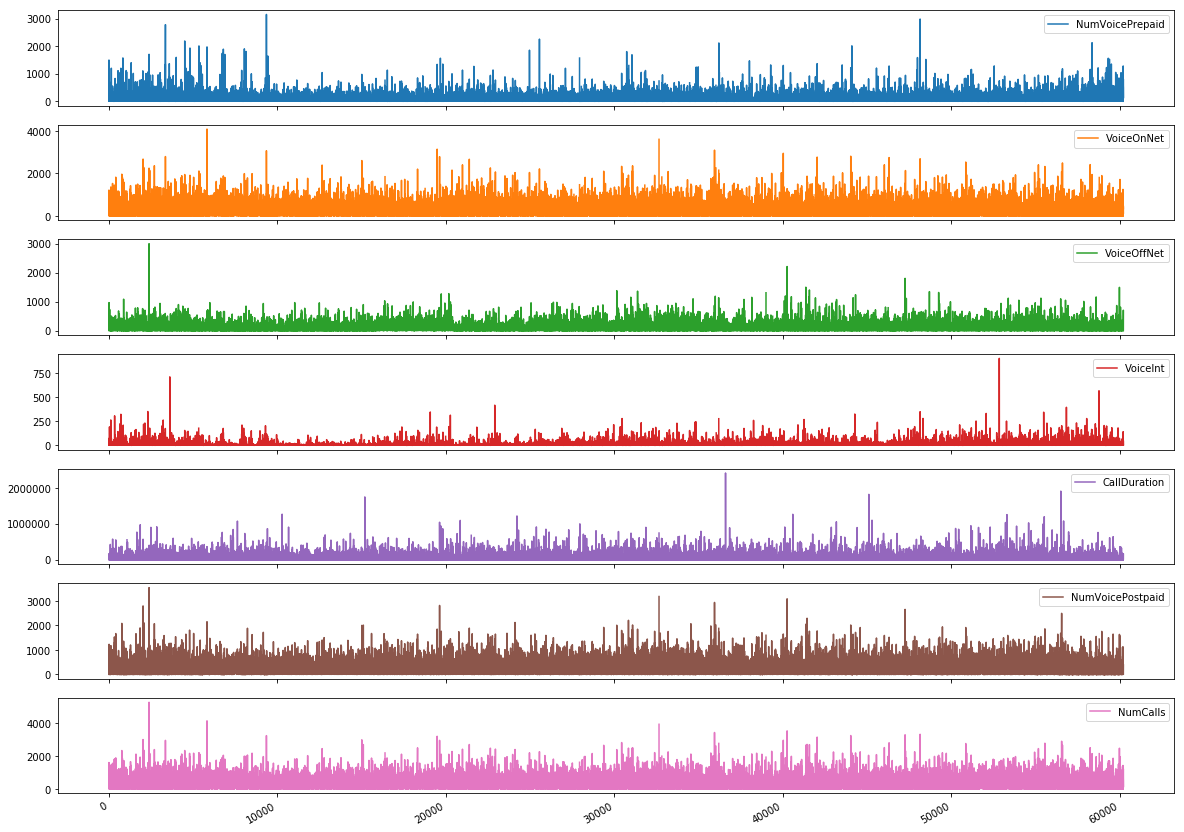

In [39]:
# It seems like those variables are continous, they maybe will need to be scaled 
df2[df2.columns[11:18]].plot(subplots=True, figsize=(20,16))

In [40]:
df2[df2.columns[11:18]].corr()

NumVoicePrepaid  VoiceOnNet  VoiceOffNet  VoiceInt  \
NumVoicePrepaid          1.000000    0.726943     0.206211  0.246539   
VoiceOnNet               0.726943    1.000000     0.213297  0.075908   
VoiceOffNet              0.206211    0.213297     1.000000  0.054266   
VoiceInt                 0.246539    0.075908     0.054266  1.000000   
CallDuration             0.411784    0.572363     0.273170  0.061961   
NumVoicePostpaid         0.386804    0.819291     0.620522  0.054461   
NumCalls                 0.703667    0.926139     0.561761  0.141966   

                  CallDuration  NumVoicePostpaid  NumCalls  
NumVoicePrepaid       0.411784          0.386804  0.703667  
VoiceOnNet            0.572363          0.819291  0.926139  
VoiceOffNet           0.273170          0.620522  0.561761  
VoiceInt              0.061961          0.054461  0.141966  
CallDuration          1.000000          0.546947  0.588458  
NumVoicePostpaid      0.546947          1.000000  0.927405  
NumCalls              0.588458          0.927405  1.000000

In [41]:
df2[df2.columns[18]].value_counts()

0.0    57749
Name: RoamingInbound, dtype: int64

### Revenues

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214C65110B8>,
      dtype=object)

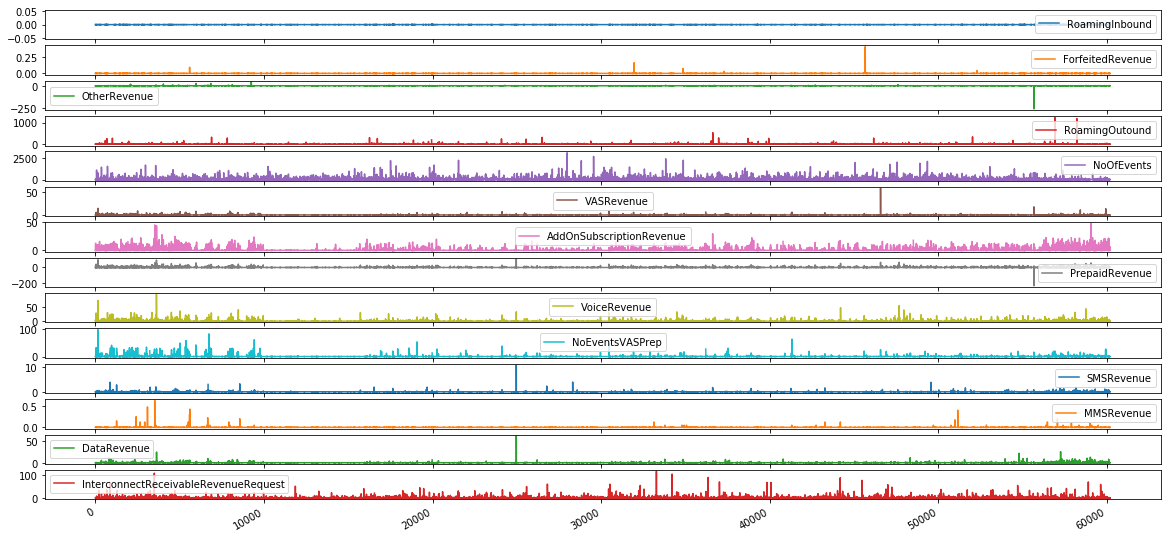

In [42]:
df2[df2.columns[18:32]].plot(subplots=True, figsize=(20,10))


In [43]:
df2[df2.columns[18:32]].corr()

RoamingInbound  ForfeitedRevenue  \
RoamingInbound                                   NaN               NaN   
ForfeitedRevenue                                 NaN          1.000000   
OtherRevenue                                     NaN          0.000240   
RoamingOutound                                   NaN         -0.000560   
NoOfEvents                                       NaN         -0.001154   
VASRevenue                                       NaN         -0.000373   
AddOnSubscriptionRevenue                         NaN          0.001230   
PrepaidRevenue                                   NaN          0.003311   
VoiceRevenue                                     NaN          0.003224   
NoEventsVASPrep                                  NaN         -0.000495   
SMSRevenue                                       NaN         -0.000381   
MMSRevenue                                       NaN         -0.000145   
DataRevenue                                      NaN          0.003107   
InterconnectReceivableRevenueRequest             NaN         -0.001285   

                                      OtherRevenue  RoamingOutound  \
RoamingInbound                                 NaN             NaN   
ForfeitedRevenue                          0.000240       -0.000560   
OtherRevenue                              1.000000       -0.000077   
RoamingOutound                           -0.000077        1.000000   
NoOfEvents                               -0.000074        0.161887   
VASRevenue                               -0.196079        0.002022   
AddOnSubscriptionRevenue                  0.003048        0.010426   
PrepaidRevenue                            0.367306        0.013767   
VoiceRevenue                              0.016330        0.011893   
NoEventsVASPrep                          -0.025870        0.007893   
SMSRevenue                                0.014955        0.010536   
MMSRevenue                               -0.001108       -0.000812   
DataRevenue                               0.004802        0.013930   
InterconnectReceivableRevenueRequest     -0.000175        0.063091   

                                      NoOfEvents  VASRevenue  \
RoamingInbound                               NaN         NaN   
ForfeitedRevenue                       -0.001154   -0.000373   
OtherRevenue                           -0.000074   -0.196079   
RoamingOutound                          0.161887    0.002022   
NoOfEvents                              1.000000    0.004982   
VASRevenue                              0.004982    1.000000   
AddOnSubscriptionRevenue               -0.017642    0.187138   
PrepaidRevenue                         -0.002500    0.252021   
VoiceRevenue                            0.015091    0.207325   
NoEventsVASPrep                         0.010378    0.606983   
SMSRevenue                              0.000457    0.070565   
MMSRevenue                             -0.002957    0.038157   
DataRevenue                             0.001391    0.061465   
InterconnectReceivableRevenueRequest    0.086182    0.002428   

                                      AddOnSubscriptionRevenue  \
RoamingInbound                                             NaN   
ForfeitedRevenue                                      0.001230   
OtherRevenue                                          0.003048   
RoamingOutound                                        0.010426   
NoOfEvents                                           -0.017642   
VASRevenue                                            0.187138   
AddOnSubscriptionRevenue                              1.000000   
PrepaidRevenue                                        0.785452   
VoiceRevenue                                          0.338281   
NoEventsVASPrep                                       0.243345   
SMSRevenue                                            0.170460   
MMSRevenue                                            0.128030   
DataRevenue                                           0.2

In [44]:
# 'RoamingInbound' is has 57749 zeros 
#df2[df2.columns[18]].value_counts()
#df2.columns[18]

In [45]:
# 'ForfeitedRevenue' has 57742 zeros   
#df2[df2.columns[19]].value_counts()
#df2.columns[19]

In [46]:
# 'OtherRevenue'  has 57260 zeros and other different values
df2[df2.columns[20]].value_counts()
# df2.columns[20]

 0.000      57260
 0.035        218
 0.050         99
 0.070         13
 0.105          7
 0.100          7
-0.033          6
 0.150          6
 0.350          5
-0.066          3
-2.500          3
 0.085          3
 0.175          2
 1.500          2
 0.140          2
-0.627          2
 0.200          2
 2.780          2
 0.245          2
 0.930          2
 0.135          2
 3.795          2
 1.470          2
-1.000          2
 0.185          2
-8.000          1
 9.180          1
 0.255          1
 6.450          1
 3.940          1
 1.635          1
 3.547          1
-4.802          1
 0.595          1
 5.860          1
-1.465          1
 5.330          1
-2.000          1
 1.980          1
 5.480          1
 4.000          1
-4.000          1
 1.000          1
 4.720          1
 1.915          1
 0.335          1
 0.620          1
 2.590          1
 1.400          1
-0.130          1
 0.850          1
-0.229          1
 41.405         1
-9.000          1
 3.760          1
 0.940    

In [47]:
#  'RoamingOutound' contains 48115 of zeros and rest variables
#df2[df2.columns[21]].value_counts()
# df2.columns[21]

In [48]:
# 'NoOfEvents' - continous variable
#df2[df2.columns[22]].plot()
#df2.columns[22]

In [49]:
# 'VASRevenue' has 57150 zeros 
#df2[df2.columns[23]].value_counts()
#df2.columns[23]

In [50]:
# 'AddOnSubscriptionRevenue' 54624 zeros
#df2[df2.columns[24]].value_counts()
# df2.columns[24]

In [51]:
#  'PrepaidRevenue' has 53972 zeros
#df2[df2.columns[25]].plot()
#df2.columns[25]

In [52]:
# 'VoiceRevenue' has 54924 zeros
df2[df2.columns[26]].value_counts()
# df2.columns[26]

0.000     54924
0.033        62
0.066        33
0.099        31
0.165        25
0.132        25
0.198        20
0.990        19
0.330        18
0.297        17
0.080        17
0.429        16
0.040        14
0.960        13
0.396        13
0.264        13
0.016        13
0.462        12
0.200        12
0.528        12
0.627        12
0.726        11
0.363        10
0.048        10
0.495        10
1.287        10
0.561         9
0.660         9
0.792         9
0.231         9
0.240         9
0.180         9
0.693         9
0.496         9
0.032         8
0.160         8
0.992         8
2.178         8
1.089         8
1.452         7
0.370         7
0.500         7
0.192         7
1.914         7
0.050         7
1.000         7
0.096         7
0.759         7
0.112         7
2.000         6
0.858         6
0.800         6
0.220         6
0.957         6
0.020         6
0.480         6
0.400         6
0.064         6
0.090         6
0.768         5
0.924         5
3.000         5
1.152   

In [53]:
#  'NoEventsVASPrep'has 57082 zeros
#df2[df2.columns[27]].value_counts()
#df2.columns[27]

In [54]:
# 'SMSRevenue' has 56680 zeros
#df2[df2.columns[28]].value_counts()
#df2.columns[28] 

In [55]:
# 'MMSRevenue' has 57707 zeros
#df2[df2.columns[29]].value_counts()
# df2.columns[29] 

In [56]:
#  'DataRevenue' has 56030 zeros
#df2[df2.columns[30]].value_counts()
#df2.columns[30] 

In [57]:
# 'InterconnectReceivableRevenueRequest' is a continous variable
#df2[df2.columns[31]].plot()
# df2.columns[31] 

In [58]:
# 'InterconnectPayableRevenue' is a continous variable
df2[df2.columns[32]].value_counts()
#df2.columns[32] 

0.00000     1727
0.03400      106
0.00450       42
0.06800       29
0.00900       21
0.01350       20
0.00265       15
0.00276       15
0.00212       15
0.00233       14
0.00287       12
0.00308       12
0.00165       12
0.00574       11
0.00563       10
0.00531       10
0.10200       10
0.00320       10
0.00011       10
0.00298       10
0.00541       10
0.00180        9
0.00022        9
0.00584        9
0.00595        9
0.00467        9
0.11268        9
0.00255        9
0.00329        9
0.00244        8
0.00508        8
0.00637        8
0.00318        8
0.00220        8
0.00871        8
0.00121        8
0.00148        8
0.00170        8
0.00191        8
0.00223        8
0.00033        8
0.01501        8
0.00552        8
0.00154        8
0.00382        8
0.00605        8
0.00838        8
0.00231        7
0.00116        7
0.00198        7
0.00010        7
0.01222        7
0.00478        7
0.00684        7
0.00860        7
0.00095        7
0.00648        7
0.03620        7
0.00520       

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000214C6941E10>,
      dtype=object)

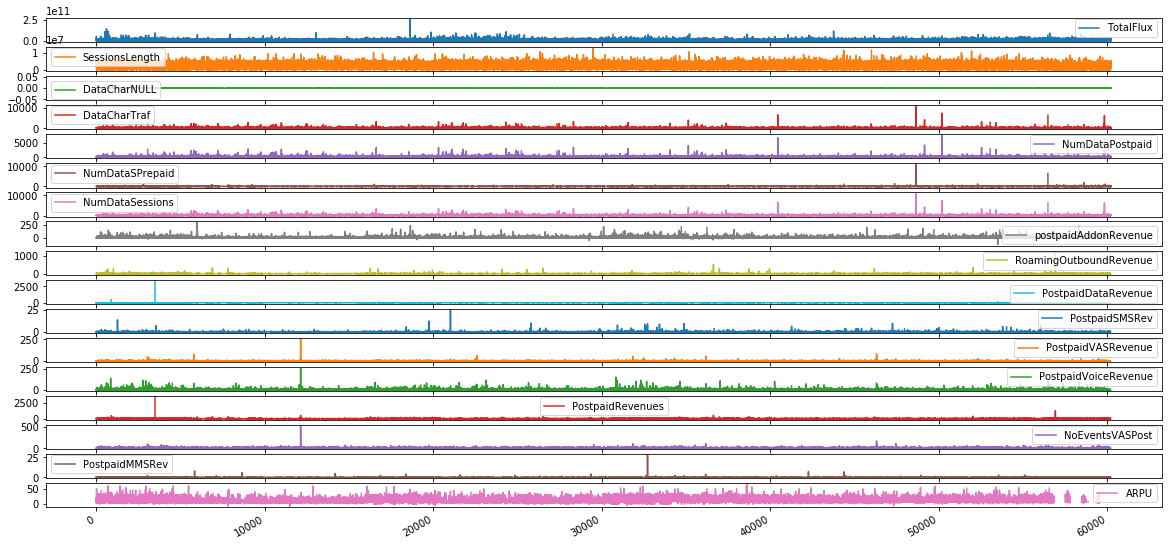

In [59]:
df2[df2.columns[33:50]].plot(subplots=True, figsize=(20,10))

In [60]:
# 'TotalFlux' is a continous variable
#df2[df2.columns[33]].plot()
# df2.columns[33] 

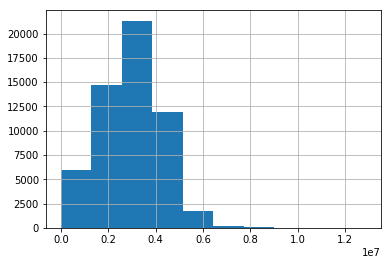

In [61]:
# 'SessionsLength'  is a continous variable
df2[df2.columns[34]].hist()
# df2.columns[34] 

In [62]:
# 'DataCharNULL' 0 zero everywhere
#df2[df2.columns[35]].value_counts()
#df2.columns[35] 

In [63]:
#  'DataCharTraf' is a continous variable
#df2[df2.columns[36]].plot()  
#df2.columns[36] 

In [64]:
# 'NumDataPostpaid' is a continous variable
#df2[df2.columns[37]].value_counts()  
#df2.columns[37] 

In [65]:
# 'NumDataSPrepaid' has 52309 zeros
#df2[df2.columns[38]].value_counts()  
#df2.columns[38] 

In [66]:
# 'NumDataSessions' is a continous variable
#df2[df2.columns[39]].value_counts()  
# df2.columns[39] 

In [67]:
# 'postpaidAddonRevenue' is a continous variable
#df2[df2.columns[40]].value_counts()  
# df2.columns[40] 

In [68]:
# 'RoamingOutboundRevenue' has 45076 zeros
#df2[df2.columns[41]].plot()  
#df2.columns[41] 

In [69]:
# 'PostpaidDataRevenue' has 54659 zeros
#df2[df2.columns[42]].value_counts()  
#df2.columns[42] 

In [70]:
# 'PostpaidSMSRev' has 37535 zeros
#df2[df2.columns[43]].value_counts()  
#df2.columns[43] 

In [71]:
# 'PostpaidSMSRev' has 37535 zeros
#df2[df2.columns[43]].value_counts()  
#df2.columns[43] 

In [72]:
# 'PostpaidVASRevenue' has 49423 zeros
#df2[df2.columns[44]].value_counts()  
#df2.columns[44] 

In [73]:
# 'PostpaidVoiceRevenue' has 16184 zeros but is continous
#df2[df2.columns[45]].plot()  
#df2.columns[45] 

In [74]:
# 'PostpaidRevenues' is a continuouse variable
#df2[df2.columns[46]].value_counts()  
#df2.columns[46] 

In [75]:
# 'NoEventsVASPost'  has 48565 zeros
#df2[df2.columns[47]].value_counts()  
#df2.columns[47] 

In [76]:
# 'PostpaidMMSRev'  has 53032 zeros
#df2[df2.columns[48]].value_counts()  
# df2.columns[48] 

In [77]:
# 'ARPU' is a continous variable but skewed and has some negative values
#df2[df2.columns[49]].hist()   
# df2.columns[49] 

# Feature Engineering

Dummies

In [78]:
df_obj.columns

Index(['SnapshotDate', 'StartDate', 'EndDate', 'Cycle', 'CustomerStatus',
       'CustomerTypeGroup', 'CustomerSegment', 'PackagePlanSubscriptionDate',
       'SalesChannel', 'Gender', 'BirthDate', 'MaritalStatus', 'Nationality',
       'Occupation', 'RechargeMonth'],
      dtype='object')

In [79]:
columns=['SnapshotDate', 'Cycle', 'CustomerSegment', 'SalesChannel', 'Gender', 'MaritalStatus', 'Nationality', 'Occupation']

In [80]:
df_dummies=pd.get_dummies(df_obj[columns], columns=columns, drop_first=True, dummy_na=True)

In [81]:
df_dummies.shape

(58536, 195)

I will start by taking into account only those features that have more that 85% of non-missing values and amoung those only features that are almost zero everywhere. Therefore, with small number of missing values we could try to impute median instead of missing values and hope that distributions of data will not change drastically. 

In [82]:
num_columns=[11,12,13,15,16,17,22,31,32,33,34,36,37,39,40,45,46,49]

In [83]:
df3=df2[  df2.columns[num_columns]  ]
#df3=df2[  df2.columns[[33, 46,40,49]]  ]
df3['Age']=age


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
np.all(age.index==df3.index)

True

In [85]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58536 entries, 1 to 60213
Data columns (total 19 columns):
NumVoicePrepaid                         57852 non-null float64
VoiceOnNet                              57852 non-null float64
VoiceOffNet                             57852 non-null float64
CallDuration                            57852 non-null float64
NumVoicePostpaid                        57852 non-null float64
NumCalls                                57852 non-null float64
NoOfEvents                              57749 non-null float64
InterconnectReceivableRevenueRequest    57749 non-null float64
InterconnectPayableRevenue              57749 non-null float64
TotalFlux                               55897 non-null float64
SessionsLength                          55897 non-null float64
DataCharTraf                            55897 non-null float64
NumDataPostpaid                         55897 non-null float64
NumDataSessions                         55897 non-null float64
postpaidA

In [86]:
df3.describe()

NumVoicePrepaid    VoiceOnNet   VoiceOffNet  CallDuration  \
count     57852.000000  57852.000000  57852.000000  5.785200e+04   
mean         71.704556    217.248237     77.808477  4.623312e+04   
std         116.765940    242.054531    109.181065  6.979729e+04   
min           0.000000      0.000000      0.000000  1.000000e+00   
25%          10.000000     58.000000     12.000000  1.046250e+04   
50%          34.000000    142.000000     39.000000  2.582800e+04   
75%          86.000000    292.000000    100.000000  5.518775e+04   
max        3154.000000   4094.000000   2996.000000  2.415456e+06   

       NumVoicePostpaid      NumCalls    NoOfEvents  \
count      57852.000000  57852.000000  57749.000000   
mean         227.775963    299.480519     14.244022   
std          221.799087    287.861931     75.850493   
min            0.000000      1.000000      0.000000   
25%           74.000000    106.000000      0.000000   
50%          169.000000    221.000000      0.000000   
75%          313.000000    402.000000      0.000000   
max         3544.000000   5250.000000   3126.000000   

       InterconnectReceivableRevenueRequest  InterconnectPayableRevenue  \
count                          57749.000000                57749.000000   
mean                               0.380865                    1.721972   
std                                2.109530                    5.485131   
min                                0.000000                    0.000000   
25%                                0.007920                    0.141440   
50%                                0.033800                    0.523490   
75%                                0.122340                    1.538360   
max                              114.343020                  475.138150   

          TotalFlux  SessionsLength  DataCharTraf  NumDataPostpaid  \
count  5.589700e+04    5.589700e+04  55897.000000     55897.000000   
mean   9.228166e+09    2.979461e+06    121.627690       114.414620   
std    7.327931e+09    1.299788e+06    157.603167       147.947664   
min    2.900000e+01    0.000000e+00      1.000000         0.000000   
25%    4.248217e+09    2.210084e+06     43.000000        36.000000   
50%    8.303502e+09    2.967367e+06     84.000000        79.000000   
75%    1.227219e+10    3.858651e+06    154.000000       148.000000   
max    2.615203e+11    1.286581e+07  10925.000000      7491.000000   

       NumDataSessions  postpaidAddonRevenue  PostpaidVoiceRevenue  \
count     55897.000000          54710.000000          54710.000000   
mean        121.627690              9.647099              2.240990   
std         157.603167             10.367751              5.219899   
min           1.000000           -123.920000              0.000000   
25%          43.000000              5.000000              0.000000   
50%          84.000000              7.000000              0.550000   
75%         154.000000             12.000000              2.485000   
max       10925.000000            291.000000            256.810000   

       PostpaidRevenues          ARPU           Age  
count      54710.000000  50195.000000  58121.000000  
mean          13.114826      9.541582     42.018479  
std           22.165066      6.708837     11.794361  
min          -48.793000     -8.000000     17.000000  
25%            6.080000      5.000000     33.000000  
50%            8.226000      7.000000     40.000000  
75%           15.060000     12.000000     50.000000  
max         3381.421000     65.000000    129.000000

In [87]:
df3

NumVoicePrepaid  VoiceOnNet  VoiceOffNet  CallDuration  \
1                 54.0       109.0        213.0       30086.0   
2                 46.0       248.0         15.0       60040.0   
3                 52.0       377.0        110.0       50901.0   
4                 22.0       138.0          7.0       12110.0   
5                 35.0       148.0         24.0       19604.0   
6                  2.0         6.0          0.0         811.0   
7                121.0       456.0          4.0      130779.0   
8                  9.0       163.0          6.0       17288.0   
9                 45.0       173.0        313.0       30754.0   
10                61.0       244.0         27.0       20735.0   
11              1498.0      1219.0        388.0      167624.0   
12               150.0       146.0          4.0       23310.0   
13                24.0       396.0        395.0      105007.0   
14                38.0       132.0         97.0       31968.0   
15              1322.0       517.0        964.0       75840.0   
16                22.0        37.0         38.0        6895.0   
17                 3.0        12.0         19.0       20060.0   
18               327.0       888.0        670.0      102699.0   
19                35.0       266.0        188.0       36439.0   
20                13.0       323.0         15.0      149135.0   
21               130.0        54.0          4.0       10110.0   
22                10.0        52.0          9.0       12305.0   
23                24.0        96.0          2.0       19604.0   
24               643.0       716.0          0.0       45895.0   
25                10.0        39.0         84.0        6792.0   
26                93.0       342.0         70.0       27055.0   
27               105.0       175.0        386.0       77974.0   
28                10.0        90.0         61.0        6957.0   
29                27.0       218.0          2.0       10498.0   
30                 4.0       125.0        131.0       32325.0   
31                 4.0        49.0         10.0       17589.0   
32               122.0       566.0         46.0       35978.0   
33                 7.0        24.0         79.0       25263.0   
34               101.0       478.0        101.0       86706.0   
35               194.0       488.0        102.0       90655.0   
36               107.0       318.0          8.0      163669.0   
37                43.0       254.0         12.0       26857.0   
38                35.0       218.0        142.0       26785.0   
39                15.0        37.0         14.0        5999.0   
40                 6.0        46.0        132.0       19879.0   
41                 8.0        70.0        120.0       27640.0   
42               701.0       480.0         84.0      127904.0   
43               401.0       938.0         91.0       80823.0   
44                16.0       240.0          9.0       28468.0   
45                 9.0        86.0         33.0       10315.0   
46                40.0       324.0         40.0       48638.0   
47                10.0        85.0         27.0       13382.0   
48                 5.0        20.0         39.0        3698.0   
49               188.0       768.0        295.0       87917.0   
50                13.0       131.0         90.0       27045.0   
51               135.0       400.0         48.0       30793.0   
53               104.0       389.0        727.0       83888.0   
54                12.0        36.0         23.0       18395.0   
55                20.0       318.0         44.0       61851.0   
56                60.0       188.0         58.0       26480.0   
57                 6.0        96.0         13.0        9063.0   
58                43.0       262.0          7.0       45347.0   
59                34.0        94.0         44.0        9369.0   
60                 0.0         5.0         19.0        4759.0   
61                71.0       278.0         63.0       51136.0   
62                 0.0         0.0        

In [88]:
median=df3.median()
median
df4=df3.fillna(median)

In [89]:
df4.shape

(58536, 19)

In [90]:
df4=pd.concat([df4, df_dummies], axis=1)

In [91]:
# It appears that some customers have responded to more than one campaigns. Therefore, we have to separate rows with 
# two '1' into two different columns  
# let's delete those row with two responses until better way is conceded
# in the process of deleting we lost half of the observations that have campaign_8 as a positive response.

df5=target[ target.sum(axis=1)==2 ]
ind=df5.index

df5.sum()

campaign_1     107
campaign_2      30
campaign_3      78
campaign_4       6
campaign_5     129
campaign_6       1
campaign_7       2
campaign_8     345
campaign_9       1
campaign_10      7
campaign_11      0
campaign_12      0
campaign_13      0
campaign_14      0
campaign_15      0
campaign_16      0
dtype: int64

In [92]:
df5=df5.copy()

In [93]:
for k in range(len(df5)):
    idx=[i for i,j in enumerate(df5.values[k]) if j ==1 ]
    df5.values[k, idx[1] ]=0
        
df5.head()


campaign_1  campaign_2  campaign_3  campaign_4  campaign_5  campaign_6  \
40            0           0           0           0           1           0   
57            1           0           0           0           0           0   
128           0           0           0           0           1           0   
312           1           0           0           0           0           0   
464           1           0           0           0           0           0   

     campaign_7  campaign_8  campaign_9  campaign_10  campaign_11  \
40            0           0           0            0            0   
57            0           0           0            0            0   
128           0           0           0            0            0   
312           0           0           0            0            0   
464           0           0           0            0            0   

     campaign_12  campaign_13  campaign_14  campaign_15  campaign_16  
40             0            0            0            0            0  
57             0            0            0            0            0  
128            0            0            0            0            0  
312            0            0            0            0            0  
464            0            0            0            0            0

In [94]:
target1=target.drop(ind)
target1=target1.append(df5)
target1.sort_index(inplace=True)

target1.head()

campaign_1  campaign_2  campaign_3  campaign_4  campaign_5  campaign_6  \
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   
5           0           0           0           0           0           0   

   campaign_7  campaign_8  campaign_9  campaign_10  campaign_11  campaign_12  \
1           0           0           0            0            0            0   
2           0           0           0            0            0            0   
3           0           0           0            0            0            0   
4           0           0           0            0            0            0   
5           0           0           0            0            0            0   

   campaign_13  campaign_14  campaign_15  campaign_16  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  
5            0            0            0            0

Let's use the same thing to separate labeled and unlabeled data

In [95]:
(target1.sum(axis=1)==2).sum()

0

In [96]:
labeled_y_bin=target1[ target1.sum(axis=1)==1]
labeled_X=df4[ target1.sum(axis=1)==1]

In [97]:
labeled_y_bin.values

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
labeled_X.describe()

NumVoicePrepaid   VoiceOnNet  VoiceOffNet  CallDuration  \
count      9004.000000  9004.000000  9004.000000  9.004000e+03   
mean         65.114283   231.661928    85.707574  4.968303e+04   
std          92.750225   251.108568   112.362035  7.407986e+04   
min           0.000000     0.000000     0.000000  1.000000e+00   
25%          11.000000    66.000000    18.000000  1.264750e+04   
50%          34.000000   156.000000    47.000000  2.849200e+04   
75%          82.000000   312.000000   109.000000  6.005975e+04   
max        1303.000000  3610.000000  2209.000000  2.415456e+06   

       NumVoicePostpaid     NumCalls   NoOfEvents  \
count       9004.000000  9004.000000  9004.000000   
mean         255.792315   321.080520    15.642936   
std          227.339123   296.208997    78.603990   
min            0.000000     1.000000     0.000000   
25%          103.000000   125.000000     0.000000   
50%          197.000000   240.000000     0.000000   
75%          341.000000   428.000000     0.000000   
max         3181.000000  3919.000000  2045.000000   

       InterconnectReceivableRevenueRequest  InterconnectPayableRevenue  \
count                           9004.000000                 9004.000000   
mean                               0.362277                    1.668500   
std                                1.587626                    4.664563   
min                                0.000000                    0.000000   
25%                                0.012680                    0.181503   
50%                                0.044140                    0.580095   
75%                                0.143315                    1.547525   
max                               59.464730                  177.371900   

          TotalFlux  SessionsLength  DataCharTraf  NumDataPostpaid  \
count  9.004000e+03    9.004000e+03   9004.000000      9004.000000   
mean   8.837612e+09    3.056746e+06    121.699467       121.294425   
std    6.170224e+09    1.229453e+06    151.924566       152.004399   
min    1.840000e+02    2.000000e+00      1.000000         0.000000   
25%    4.730899e+09    2.317053e+06     46.000000        46.000000   
50%    8.303502e+09    2.973466e+06     84.000000        83.000000   
75%    1.162741e+10    3.907208e+06    152.000000       152.000000   
max    8.445133e+10    9.468359e+06   7491.000000      7491.000000   

       NumDataSessions  postpaidAddonRevenue  PostpaidVoiceRevenue  \
count      9004.000000           9004.000000           9004.000000   
mean        121.699467              9.330784              2.529740   
std         151.924566              9.280617              5.335426   
min           1.000000            -17.500000              0.000000   
25%          46.000000              5.000000              0.000000   
50%          84.000000              7.000000              0.720000   
75%         152.000000             10.500000              2.990000   
max        7491.000000            160.000000            107.230000   

       PostpaidRevenues         ARPU          Age  SnapshotDate_2017-02-28  \
count       9004.000000  9004.000000  9004.000000              9004.000000   
mean          13.015940     9.505584    42.156597                 0.305753   
std           13.882382     6.801167    11.568970                 0.460751   
min           -1.730000    -6.000000    20.000000                 0.000000   
25%            6.500000     5.000000    33.000000                 0.000000   
50%            8.222500     7.000000    40.000000                 0.000000   
75%           15.020000    11.325750    50.000000                 1.000000   
max          266.266000    65.000000   118.000000                 1.000000   

       SnapshotDate_2017-04-30  SnapshotDate_nan  Cycle_14 Months  \
count              9004.000000            9004.0      9004.000000   
mean                  0.372945               0.0         0.000333   
std                   0.483615               0.0         0.018251   
min              

In [99]:
df22=df2.drop(   df2.columns[num_columns], axis=1 )

In [100]:
# taking only labeled rows
df22=df22[ target1.sum(axis=1)==1]

In [101]:
df22.isnull().sum()

ChurnPresure2                            0
allpresure2                              0
ChurnPresure1                            0
iospresure1                              0
iospresure2                              0
allpresure1                              0
RGE30Subscriberbase                     18
RGE90Subscriberbase                     18
RGE1Subscriberbase                      18
EoPProvisionedBase                      18
EoP_SubscribersApOG                     21
VoiceInt                                87
RoamingInbound                          58
ForfeitedRevenue                        58
OtherRevenue                            58
RoamingOutound                          58
VASRevenue                              58
AddOnSubscriptionRevenue                58
PrepaidRevenue                          58
VoiceRevenue                            58
NoEventsVASPrep                         58
SMSRevenue                              58
MMSRevenue                              58
DataRevenue

In [102]:
# droping all columns with less than 200 values
df22.dropna(axis=1, thresh=200, inplace=True)

In [103]:
## Creating matrix of dummies for missing values
df222=(df22.isnull()).astype(int)

In [104]:
## Filling NAN with 0 
df22.fillna(0, inplace=True)

In [105]:
df222.columns=df222.add_suffix('_missing').columns

In [106]:
df222.isnull()

ChurnPresure2_missing  allpresure2_missing  ChurnPresure1_missing  \
6                      False                False                  False   
13                     False                False                  False   
14                     False                False                  False   
26                     False                False                  False   
39                     False                False                  False   
40                     False                False                  False   
46                     False                False                  False   
57                     False                False                  False   
82                     False                False                  False   
85                     False                False                  False   
90                     False                False                  False   
91                     False                False                  False   
95                     False                False                  False   
98                     False                False                  False   
112                    False                False                  False   
115                    False                False                  False   
120                    False                False                  False   
121                    False                False                  False   
128                    False                False                  False   
144                    False                False                  False   
172                    False                False                  False   
178                    False                False                  False   
186                    False                False                  False   
202                    False                False                  False   
205                    False                False                  False   
207                    False                False                  False   
208                    False                False                  False   
218                    False                False                  False   
220                    False                False                  False   
232                    False                False                  False   
239                    False                False                  False   
240                    False                False                  False   
244                    False                False                  False   
250                    False                False                  False   
256                    False                False                  False   
261                    False                False                  False   
262                    False                False                  False   
275                    False                False                  False   
278                    False                False                  False   
280                    False                False                  False   
310                    False                False                  False   
312                    False                False                  False   
314                    False                False                  False   
318                    False                False                  False   
329                    False                False                  False   
331                    False                False                  False   
335                    False                False                  False   
338                    False                False                  False   
340                    False                False                  False   
342                    False                False                  False   
343                    False                False                  False   
358                    False                False      

In [107]:
df22.shape

(9004, 86)

In [108]:
labeled_X=pd.concat([labeled_X, df22, df222], axis=1)

In [109]:
labeled_X.head()

NumVoicePrepaid  VoiceOnNet  VoiceOffNet  CallDuration  NumVoicePostpaid  \
6               2.0         6.0          0.0         811.0               4.0   
13             24.0       396.0        395.0      105007.0             769.0   
14             38.0       132.0         97.0       31968.0             191.0   
26             93.0       342.0         70.0       27055.0             320.0   
39             15.0        37.0         14.0        5999.0              36.0   

    NumCalls  NoOfEvents  InterconnectReceivableRevenueRequest  \
6        6.0         6.0                               0.03124   
13     793.0         0.0                               1.19646   
14     229.0         0.0                               0.00352   
26     413.0         0.0                               0.14514   
39      51.0         3.0                               0.00220   

    InterconnectPayableRevenue     TotalFlux  SessionsLength  DataCharTraf  \
6                      0.00000  8.177571e+09       3276916.0          43.0   
13                     6.87178  1.200359e+10       2475632.0         226.0   
14                     1.05958  1.442127e+10       1629537.0         272.0   
26                     0.99609  1.088901e+10       2318882.0         151.0   
39                     0.21137  1.118676e+09       5234927.0          44.0   

    NumDataPostpaid  NumDataSessions  postpaidAddonRevenue  \
6              43.0             43.0                   0.0   
13            226.0            226.0                  25.0   
14            272.0            272.0                  15.0   
26            151.0            151.0                  35.0   
39             44.0             44.0                  30.0   

    PostpaidVoiceRevenue  PostpaidRevenues  ARPU   Age  \
6                   0.00             0.000   5.0  43.0   
13                 30.04            55.300  25.0  53.0   
14                  0.00            15.000  15.0  45.0   
26                  0.84            35.840  30.0  46.0   
39                  0.00            30.784  30.0  45.0   

    SnapshotDate_2017-02-28  SnapshotDate_2017-04-30  SnapshotDate_nan  \
6                         0                        1                 0   
13                        0                        0                 0   
14                        0                        1                 0   
26                        0                        1                 0   
39                        0                        0                 0   

    Cycle_14 Months  Cycle_15 Months  Cycle_18 Months  Cycle_24 Months  \
6                 0                0                0                0   
13                0                0                1                0   
14                0                0                0                0   
26                0                0                0                0   
39                0                0                0                0   

    Cycle_nan  CustomerSegment_B  CustomerSegment_C  \
6           1                  0                  0   
13          0                  0                  0   
14          1                  0                  0   
26          1                  0                  0   
39          0                  0                  0   

    CustomerSegment_Contractor  CustomerSegment_D  CustomerSegment_Employees  \
6                            0                  0                          0   
13                           0                  0                          0   
14                           0                  0                          0   
26                           0                  0                          0   
39                           0                  0                          0   

    CustomerSegment_Government  CustomerSegment_Individual  \
6                            0                           1   
13                           0                           1   
14                           0                 

# Classification of the customers

In [110]:
from sklearn import preprocessing


In [111]:
labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labeled_y=lb.inverse_transform(labeled_y_bin.values)

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [113]:
X_train, X_test, y_train, y_test=train_test_split(labeled_X, labeled_y, test_size=.33, random_state=0)

In [114]:
X_test.shape

(2972, 386)

In [115]:
# Decision Tree produces classifiers with ~ 60 % accuracy

param_grid1 = {'max_depth': [6, 7, 8, 9, 10, 11]}

grid_search1 = GridSearchCV( DecisionTreeClassifier(), param_grid1, cv=10, n_jobs=-1)
grid_search1.fit(X_train, y_train)

print('training set accuracy is: ',grid_search1.score(X_train, y_train))
print('cross-validated max_depth of the tree is:', grid_search1.best_params_)
print('best cross-validated score is:', grid_search1.best_score_)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


training set accuracy is:  0.6243368700265252
cross-validated max_depth of the tree is: {'max_depth': 6}
best cross-validated score is: 0.603945623342175


In [116]:
print('test set accuracy is: ', grid_search1.score(X_test, y_test)) 

test set accuracy is:  0.6022880215343204


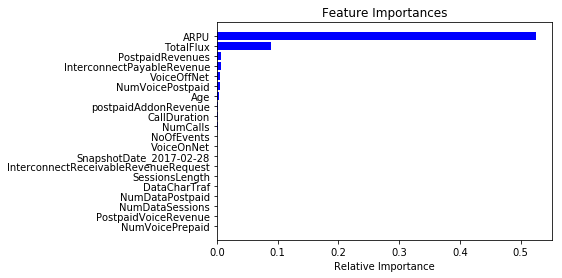

In [117]:
features = df4.columns
importances = grid_search1.best_estimator_.feature_importances_[:20]
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [118]:
# Random Forest produces 57.2% percent of accuracy
param_grid2 = {'n_estimators':[50, 100, 200],'max_depth': [5, 6, 7, 8, 9, 10]}

grid_search2 = GridSearchCV( RandomForestClassifier(), param_grid=param_grid2, cv=5, n_jobs=-1)
grid_search2.fit(X_train, y_train)

print('training set accuracy is: ',grid_search2.score(X_train, y_train))
print('cross-validated max_depth of the tree is:', grid_search2.best_params_)
print('best cross-validated score is:', grid_search2.best_score_)


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


training set accuracy is:  0.7083885941644562
cross-validated max_depth of the tree is: {'max_depth': 10, 'n_estimators': 200}
best cross-validated score is: 0.5833885941644562


In [119]:
print('test set accuracy is: ', grid_search2.score(X_test, y_test)) 

test set accuracy is:  0.5915208613728129


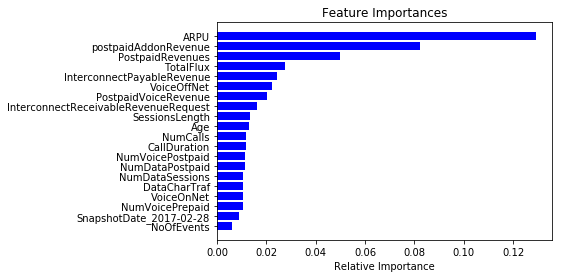

In [120]:
features2 = labeled_X.columns[:20]
importances2 = grid_search2.best_estimator_.feature_importances_[:20]
indices2 = np.argsort(importances2)

plt.title('Feature Importances')
plt.barh(range(len(indices2)), importances2[indices2], color='b', align='center')
plt.yticks(range(len(indices2)), features[indices2])
plt.xlabel('Relative Importance')
plt.show()

In [121]:
# KNN is so far the worst classifier 
clf3=KNeighborsClassifier(n_neighbors=15)
clf3.fit(X_train, y_train)

print(clf3.score(X_train, y_train))
print(clf3.score(X_test, y_test))

scores3 = cross_val_score(clf3, X_train, y_train, cv=10, n_jobs=-1)
scores3.mean() 

0.4484416445623342
0.36473755047106327


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.36460169296565254

In [122]:
X_train.shape

(6032, 386)

In [123]:
logreg=LogisticRegression(max_iter= 1000, solver='lbfgs',C=10, multi_class='multinomial', n_jobs=-1)
logreg.fit(X_train, y_train)

print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

scores4 = cross_val_score(logreg, X_train, y_train, cv=10, n_jobs=-1)
scores4.mean() 

0.3847811671087533
0.3882907133243607


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.38031163914784594

In [124]:
%%time
# Gradient Boosting produces 62.3% accuracy

param_grid3 = {'n_estimators':[100],'max_depth': [4], 'learning_rate': [.1]}

grid_search3 = GridSearchCV( GradientBoostingClassifier(), param_grid=param_grid3, cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search3.fit(X_train, y_train)

print('training set accuracy is: ',grid_search3.score(X_train, y_train))
print('cross-validated max_depth of the tree is:', grid_search3.best_params_)
print('best cross-validated score is:', grid_search3.best_score_)


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


training set accuracy is:  0.8062006194363359
cross-validated max_depth of the tree is: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
best cross-validated score is: 0.6061524366002873
Wall time: 2min 57s


In [125]:
print('test set accuracy is: ', grid_search3.score(X_test, y_test)) 

test set accuracy is:  0.6209910673125674


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [126]:
# AdaBoost gives 62 % accuracy which is the same as Gradient Boosting
param_grid4 = {'n_estimators':[50, 300], 'learning_rate': [ .001]}

grid_search4 = GridSearchCV( AdaBoostClassifier(DecisionTreeClassifier(max_depth=8)), param_grid=param_grid4, cv=5, n_jobs=-1, 
                            scoring='f1_weighted')
grid_search4.fit(X_train, y_train)

print('training set accuracy is: ',grid_search4.score(X_train, y_train))
print('cross-validated max_depth of the tree is:', grid_search4.best_params_)
print('best cross-validated score is:', grid_search4.best_score_)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


training set accuracy is:  0.7842655100984408
cross-validated max_depth of the tree is: {'learning_rate': 0.001, 'n_estimators': 300}
best cross-validated score is: 0.589755718936319


In [127]:
print('test set accuracy is: ', grid_search4.score(X_test, y_test)) 

test set accuracy is:  0.5946620988939476


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
y_pred_4=grid_search4.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_4)

array([[228,   7,  38,   2,  22,   0,   0,   9,   0,   0,   0],
       [  2, 406, 155,   2,  67,   0,   0,   3,   0,   0,   0],
       [ 19, 210, 719,   3,  71,   0,   0,   7,   0,   0,   0],
       [  3,   9,   4,  17,   3,   0,   0,   2,   0,   0,   0],
       [ 13, 172, 187,   6, 423,   0,   0,   4,   0,   0,   0],
       [  1,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  2,   4,  11,   1,   3,   0,   2,   0,   0,   0,   0],
       [  8,  28,  47,   3,  31,   1,   0,   3,   0,   0,   0],
       [  1,   1,   3,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   0,   2,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [130]:
from sklearn.metrics import classification_report
target_names = df5.columns
print(classification_report(y_test, y_pred_4))

             precision    recall  f1-score   support

          1       0.82      0.75      0.78       306
          2       0.49      0.64      0.55       635
          3       0.62      0.70      0.65      1029
          4       0.50      0.45      0.47        38
          5       0.68      0.53      0.59       805
          6       0.50      0.50      0.50         2
          7       1.00      0.09      0.16        23
          8       0.10      0.02      0.04       121
         10       0.00      0.00      0.00         7
         13       0.00      0.00      0.00         5
         16       0.00      0.00      0.00         1

avg / total       0.60      0.61      0.59      2972



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# XGBoost

In [131]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import time

In [132]:
%%time
xgb_model=xgb.XGBClassifier(max_depth=7, objective='multi:softmax',  learning_rate=.01, n_estimators=100, n_jobs=-1, reg_lambda=0.1, reg_alpha=2.5 )
xgb_model.fit(X_train, y_train)

print( xgb_model.score(X_train, y_train))
print( xgb_model.score(X_test, y_test))
xgb_model.feature_importances_

y_pred_xgb=xgb_model.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.7080570291777188
0.6345895020188426
Wall time: 1min 18s


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [133]:
confusion_matrix(y_test, y_pred_xgb)

array([[261,   6,  23,   2,  12,   0,   0,   2,   0,   0,   0],
       [  1, 377, 195,   3,  59,   0,   0,   0,   0,   0,   0],
       [ 25, 157, 795,   3,  48,   1,   0,   0,   0,   0,   0],
       [  6,   9,   2,  18,   3,   0,   0,   0,   0,   0,   0],
       [ 18, 154, 203,   5, 424,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  2,   1,   7,   0,   4,   0,   9,   0,   0,   0,   0],
       [  9,  29,  59,   4,  20,   0,   0,   0,   0,   0,   0],
       [  2,   1,   2,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

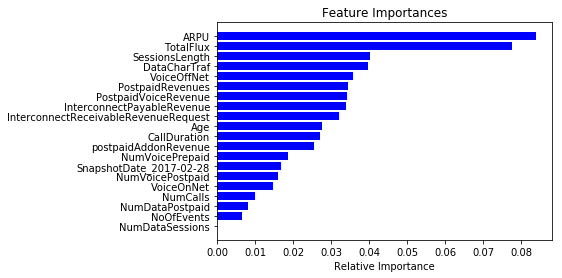

In [134]:
featuresXGB = labeled_X.columns
importancesXGB = xgb_model.feature_importances_[:20]

indicesXGB = np.argsort(importancesXGB)

plt.title('Feature Importances')
plt.barh(range(len(indicesXGB)), importancesXGB[indicesXGB], color='b', align='center')
plt.yticks(range(len(indicesXGB)), featuresXGB[indicesXGB])
plt.xlabel('Relative Importance')
plt.show()

In [135]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_xgb))

             precision    recall  f1-score   support

          1       0.80      0.85      0.83       306
          2       0.51      0.59      0.55       635
          3       0.62      0.77      0.69      1029
          4       0.51      0.47      0.49        38
          5       0.74      0.53      0.62       805
          6       0.67      1.00      0.80         2
          7       1.00      0.39      0.56        23
          8       0.00      0.00      0.00       121
         10       0.00      0.00      0.00         7
         13       0.00      0.00      0.00         5
         16       0.00      0.00      0.00         1

avg / total       0.62      0.63      0.62      2972



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
%%time
# Extreme gradient boosting produces 65% accuracy, the best so far
param_grid5 = {'max_depth':[8],'n_estimators':[10], 'subsample':[.8],
               'objective':['multi:softmax'], 'learning_rate': [.01],
               'reg_lambda':[.033], 'reg_alpha':[2] }

scores=['f1_weighted','accuracy']

for score in scores:
    grid_search5 = GridSearchCV( xgb.XGBClassifier(), param_grid=param_grid5, cv=5, n_jobs=-1, 
                            scoring=score)
    grid_search5.fit(X_train, y_train)

    print('training set accuracy is: ',grid_search5.score(X_train, y_train))
    print('cross-validated max_depth of the tree is:', grid_search5.best_params_)
    print('best cross-validated score is:', grid_search5.best_score_)


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n

training set accuracy is:  0.7026133299883172
cross-validated max_depth of the tree is: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 10, 'objective': 'multi:softmax', 'reg_alpha': 2, 'reg_lambda': 0.033, 'subsample': 0.8}
best cross-validated score is: 0.6108568475863656
training set accuracy is:  0.7153514588859416
cross-validated max_depth of the tree is: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 10, 'objective': 'multi:softmax', 'reg_alpha': 2, 'reg_lambda': 0.033, 'subsample': 0.8}
best cross-validated score is: 0.6264920424403183
Wall time: 1min 2s


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [137]:
print( grid_search5.score(X_test, y_test))

0.6278600269179004


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [138]:
y_pred_5=grid_search5.predict(X_test)
confusion_matrix(y_test, y_pred_5)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[264,   4,  23,   2,  12,   0,   0,   1,   0,   0,   0],
       [  2, 378, 204,   3,  48,   0,   0,   0,   0,   0,   0],
       [ 24, 182, 764,   3,  55,   1,   0,   0,   0,   0,   0],
       [  3,  10,   2,  23,   0,   0,   0,   0,   0,   0,   0],
       [ 20, 158, 195,   5, 426,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  2,   1,   6,   0,   4,   1,   9,   0,   0,   0,   0],
       [ 10,  24,  60,   4,  22,   1,   0,   0,   0,   0,   0],
       [  3,   0,   2,   0,   2,   0,   0,   0,   0,   0,   0],
       [  2,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [139]:
from sklearn.metrics import classification_report
target_names = df5.columns
print(classification_report(y_test, y_pred_5))

             precision    recall  f1-score   support

          1       0.80      0.86      0.83       306
          2       0.50      0.60      0.54       635
          3       0.61      0.74      0.67      1029
          4       0.57      0.61      0.59        38
          5       0.75      0.53      0.62       805
          6       0.40      1.00      0.57         2
          7       1.00      0.39      0.56        23
          8       0.00      0.00      0.00       121
         10       0.00      0.00      0.00         7
         13       0.00      0.00      0.00         5
         16       0.00      0.00      0.00         1

avg / total       0.62      0.63      0.61      2972



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Balancing the data

In [140]:
from imblearn.over_sampling import  SMOTE, ADASYN
from collections import Counter
from imblearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

## SMOTE 

In [141]:
Counter(y_train)

Counter({1: 585,
         2: 1334,
         3: 2045,
         4: 94,
         5: 1667,
         6: 9,
         7: 26,
         8: 256,
         10: 13,
         13: 3})

In [142]:
ratio={1: 2045, 2: 2045, 3: 2045, 5: 2045,8: 2045}

In [143]:
# Creating syntethic data 
sm=SMOTE( ratio=ratio,   n_jobs=-1, k_neighbors=10)

In [144]:
pca= PCA(n_components=300)

#svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)

In [145]:
# making pipeline
pipeline1 = make_pipeline(PCA(), sm,  xgb.XGBClassifier())

In [146]:
# X_train=X_train.as_matrix()
# X_test=X_test.as_matrix()

In [147]:
%%time
# XGBOOST with balanced data. It clearly overfitiing the data, but balancing improves 
# performance of the classification if f1_score is considered as a criterion. 
param_grid6 = { 'pca__n_components': [100],
                'xgbclassifier__max_depth':[5], 'xgbclassifier__n_estimators':[100], 
               'xgbclassifier__learning_rate': [.1], 'xgbclassifier__min_child_weight':[1],
               'xgbclassifier__gamma':[0],  'xgbclassifier__scale_pos_weight':[1],
               'xgbclassifier__reg_lambda':[3.5], 'xgbclassifier__reg_alpha':[4],
              'xgbclassifier__subsample':[.8], 'xgbclassifier__objective':['multi:softmax']}


grid_search6 = GridSearchCV(pipeline1, param_grid6,  cv=5, n_jobs=-1, scoring='f1_weighted')
grid_search6.fit(X_train, y_train)

print('training set accuracy is: ',grid_search6.score(X_train, y_train))
print('cross-validated max_depth of the tree is:', grid_search6.best_params_)
print('best cross-validated score is:', grid_search6.best_score_)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


training set accuracy is:  0.7979482482630875
cross-validated max_depth of the tree is: {'pca__n_components': 100, 'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__max_depth': 5, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__objective': 'multi:softmax', 'xgbclassifier__reg_alpha': 4, 'xgbclassifier__reg_lambda': 3.5, 'xgbclassifier__scale_pos_weight': 1, 'xgbclassifier__subsample': 0.8}
best cross-validated score is: 0.5567448511489334
Wall time: 6min 46s


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [148]:
print( grid_search6.score(X_test, y_test))

0.565091570520062


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [149]:
y_pred_6=grid_search6.predict(X_test)

confusion_matrix(y_test, y_pred_6)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([[272,   5,  15,   1,   8,   0,   0,   5,   0,   0,   0],
       [  1, 386, 156,   2,  70,   0,   0,  20,   0,   0,   0],
       [ 42, 232, 568,   0, 125,   0,   0,  62,   0,   0,   0],
       [  5,   7,   1,  19,   3,   0,   0,   3,   0,   0,   0],
       [ 30, 166, 164,   6, 403,   0,   0,  36,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   1,   5,   0,   4,   0,   8,   1,   0,   0,   0],
       [ 10,  23,  32,   3,  27,   0,   0,  26,   0,   0,   0],
       [  2,   0,   0,   0,   2,   0,   0,   3,   0,   0,   0],
       [  2,   0,   3,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_6))

             precision    recall  f1-score   support

          1       0.74      0.89      0.81       306
          2       0.47      0.61      0.53       635
          3       0.60      0.55      0.58      1029
          4       0.61      0.50      0.55        38
          5       0.63      0.50      0.56       805
          6       0.00      0.00      0.00         2
          7       1.00      0.35      0.52        23
          8       0.17      0.21      0.19       121
         10       0.00      0.00      0.00         7
         13       0.00      0.00      0.00         5
         16       0.00      0.00      0.00         1

avg / total       0.58      0.57      0.57      2972



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [151]:
pca_result=grid_search6.best_estimator_.steps[0][1].fit_transform(X_train)

In [152]:
grid_search6.best_estimator_.steps[0][1].explained_variance_ratio_

array([6.47254067e-01, 3.52734397e-01, 1.15216761e-05, 1.40574260e-08,
       7.10010292e-11, 5.35088268e-11, 1.85742986e-11, 7.78867792e-13,
       5.30892649e-13, 2.18642332e-13, 3.70424933e-14, 9.52101292e-15,
       1.32202242e-15, 7.78043209e-16, 1.83367306e-16, 7.30363773e-17,
       5.06087415e-17, 4.72088187e-17, 2.57300494e-17, 1.44072454e-17,
       1.14507451e-17, 8.06195669e-18, 7.00307512e-18, 2.59089987e-18,
       1.70847019e-18, 1.27916261e-18, 1.21082487e-18, 1.14582167e-18,
       7.46315256e-19, 4.59696481e-19, 4.47792953e-19, 4.39519917e-19,
       2.67469345e-19, 1.83346304e-19, 1.55574828e-19, 1.42977927e-19,
       1.04641589e-19, 4.25035635e-20, 3.45386327e-20, 2.60809216e-20,
       1.89521530e-20, 1.62729596e-20, 1.17026176e-20, 9.02372783e-21,
       7.98698168e-21, 4.93563274e-21, 3.42281617e-21, 3.06600917e-21,
       2.74976670e-21, 2.42540551e-21, 2.06651037e-21, 1.84082879e-21,
       1.74316872e-21, 1.57682298e-21, 1.53082197e-21, 1.46528811e-21,
      

In [153]:
pca_result=pd.DataFrame(pca_result[:,:3], columns=['principal component 1', 'principal component 2', 'principal component 3'])


In [154]:
from mpl_toolkits.mplot3d import Axes3D

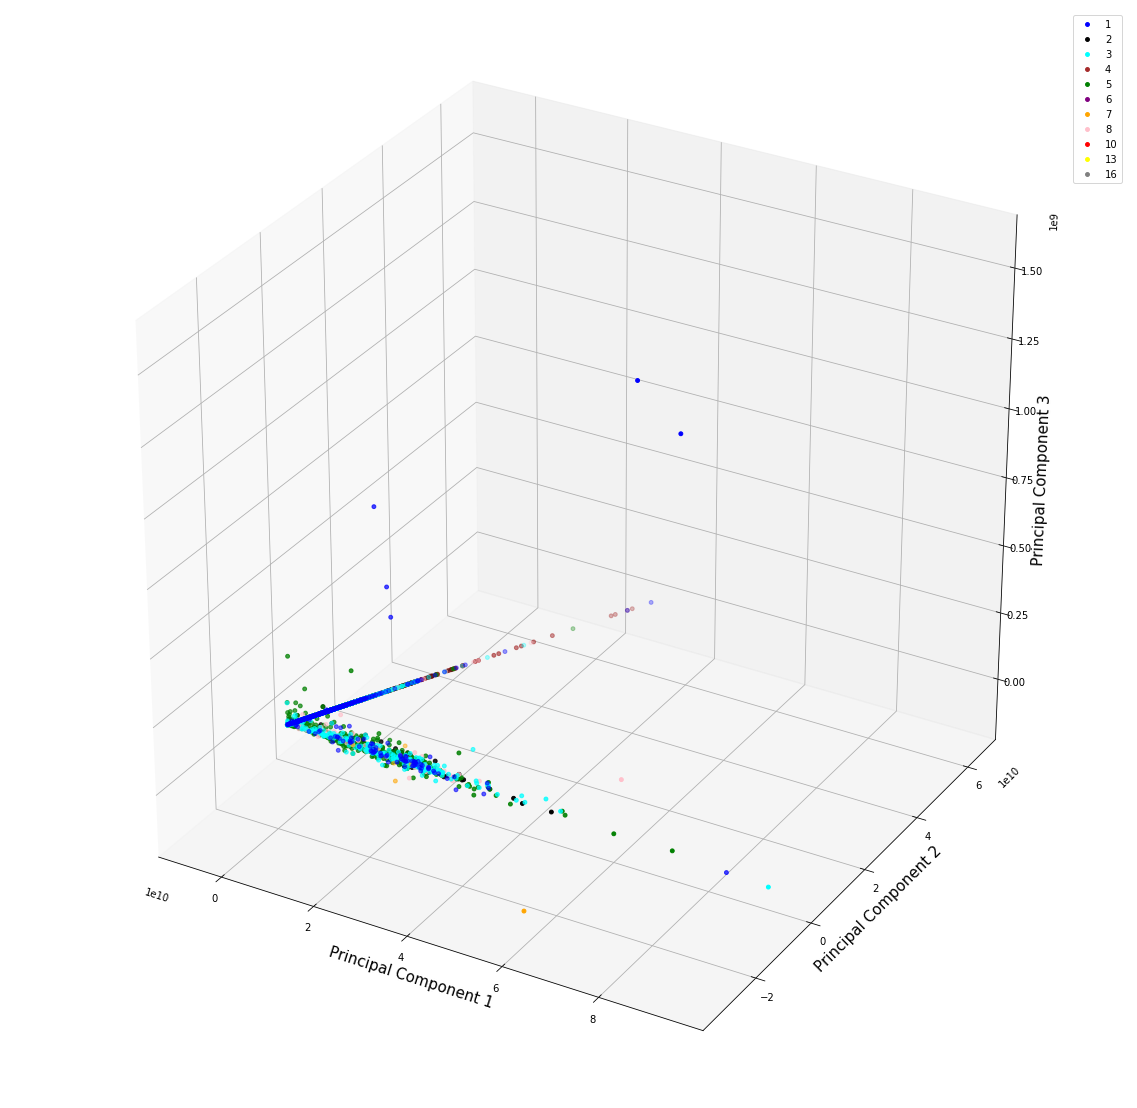

In [155]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection = '3d')
# ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

# ax.set_title('95% of variance explained PCA', fontsize = 20)
targets = [1,2,3,4,5,6,7,8,10,13,16]
colors = ['Blue', 'Black', 'Cyan', 'Brown', 'Green', 'Purple','Orange','Pink', 'Red', 'Yellow','Gray']
for target, color in zip(targets, colors):
        indicesToKeep = y_train == target
        ax.scatter( pca_result.loc[indicesToKeep, 'principal component 1']
                   ,pca_result.loc[indicesToKeep, 'principal component 2']
                   ,pca_result.loc[indicesToKeep, 'principal component 3']
                   ,c = color
                   ,s = 15 )
ax.legend(targets)